In [1]:
#ensure that matplotlib plots inline
%matplotlib inline

import os
import numpy as np
import mvpa2
import nibabel
import pickle
import gzip
from mvpa2.suite import *
import matplotlib.pyplot as plt

E:\Anaconda3\lib\site-packages\mvpa2\base\dochelpers.py:167: FutureWarning: split() requires a non-empty pattern match.
  entries = __re_spliter1.split(paramdoc)
E:\Anaconda3\lib\site-packages\mvpa2\base\dochelpers.py:167: FutureWarning: split() requires a non-empty pattern match.
  entries = __re_spliter1.split(paramdoc)
E:\Anaconda3\lib\site-packages\scipy\_lib\decorator.py:205: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  first = inspect.getargspec(caller)[0][0]  # first arg
E:\Anaconda3\lib\site-packages\scipy\optimize\nonlin.py:1502: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, varkw, defaults = inspect.getargspec(jac.__init__)
E:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:636: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  sign = inspect.getargspec(self._stats)
E:\Anaconda3\lib\site-packages\scipy\stats\_distn_in

 * Please note: warnings are printed only once, but underlying problem might occur many times *


E:\Anaconda3\lib\site-packages\mvpa2\base\dochelpers.py:167: FutureWarning: split() requires a non-empty pattern match.
  entries = __re_spliter1.split(paramdoc)
E:\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:
E:\Anaconda3\lib\site-packages\scipy\_lib\decorator.py:205: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  first = inspect.getargspec(caller)[0][0]  # first arg
E:\Anaconda3\lib\site-packages\mvpa2\base\dochelpers.py:167: FutureWarning: split() requires a non-empty pattern match.
  entries = __re_spliter1.split(paramdoc)
E:\Anaconda3\lib\site-packages\mvpa2\datasets\sources\skl_data.py:32: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  argnames, varargs, varkw, defaults = inspect.getargspec(fx)
E:\Anaconda3\lib\site-packages\pandas\__init__.py:7: Depre

In [86]:
# get the location of the files
bold_fname = os.path.join('..', 'data', 'qub', '4Dw.nii')
mask_fname = os.path.join('..', 'data', 'qub', 'struct', 'final_mask_w.hdr')
original_dataset = fmri_dataset(bold_fname, mask=mask_fname)
with open('..\\data\\story\\smoothedStoryTrajectories\\smoothTrajRawValenceMean_win50.pkl', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    original_trajectory = u.load()

In [103]:
len(original_trajectory)

5244

In [106]:
import scipy.io

s3 = scipy.io.loadmat('..\\data\\plosone\\subject_1.mat', squeeze_me=True)
s3['words']

array([('Harry', 20, 0.5), ('had', 20.5, 0.5), ('never', 21, 0.5), ...,
       ('thirteen', 2692, 0.5), ('was.', 2692.5, 0.5), ('+', 2693, 9)], 
      dtype=[('text', 'O'), ('start', 'O'), ('length', 'O')])

In [107]:
sample_per_second = 0.5
first_time = s3['words'][0][1]

start_skipped_samples = int(first_time * sample_per_second)

start_skipped_samples

10

In [108]:
len(s3['words'])

5176

In [114]:
end_time = s3['words'][len(s3['words'])-1][2]

end_skipped_samples = int(end_time * sample_per_second)

end_skipped_samples

4

In [115]:
original_dataset.shape

(1351, 65159)

In [87]:
resampled_trajectory = resample(original_trajectory, len(original_dataset.samples))

In [88]:
#resampled_trajectory = np.around(resampled_trajectory, decimals=0)

In [89]:
resampled_trajectory

array([ 0.00370295, -0.02552319, -0.11298223, ...,  0.10248396,
        0.03775303,  0.13878156])

In [90]:
target_happyness_classes = []

for i in range(0, len(resampled_trajectory)):
    value = resampled_trajectory[i]
    if(value > 0):
        target_happyness_classes.append(1)
    else:
        target_happyness_classes.append(-1)

In [91]:
len(target_happyness_classes)

1351

In [92]:
original_dataset.sa['targets'] = target_happyness_classes

In [93]:
detrender = PolyDetrendMapper(polyord=1)

In [94]:
original_dataset = original_dataset.get_mapped(detrender)

In [95]:
training_set = original_dataset[ : -400]

In [96]:
test_set = original_dataset[-400 : ]

In [97]:
clf_1 = kNN(k=3, dfx=one_minus_correlation, voting='majority')

In [98]:
clf_1.train(training_set)

In [99]:
predictions = clf_1.predict(test_set.samples)

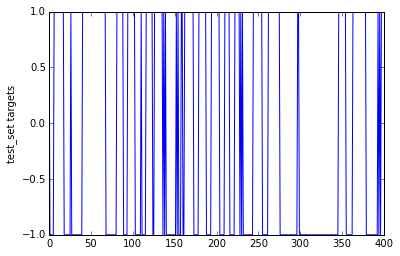

In [100]:
plt.plot(test_set.sa.targets)
plt.ylabel('test_set targets')
plt.show()

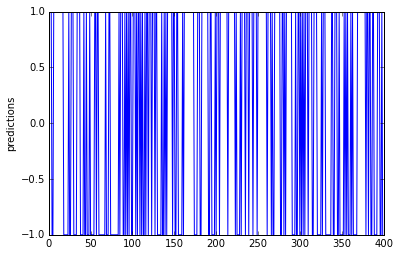

In [101]:
plt.plot(predictions)
plt.ylabel('predictions')
plt.show()

In [102]:
np.mean(predictions == test_set.sa.targets)

0.52249999999999996